# Run the whole deltas algorithm

In [25]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import reprojection

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

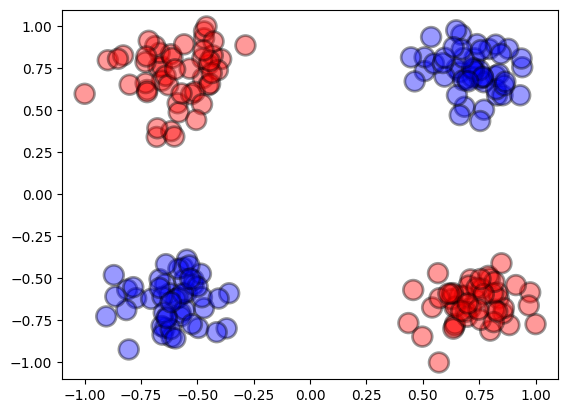

In [26]:
N1 = 100
N2 = 100
data_clf = data.get_XOR(
    N1=N1,
    N2=N2,
    scale=True)
deltas.plotting.plots.plot_classes(data_clf['data'])

## Get Classifier

clf


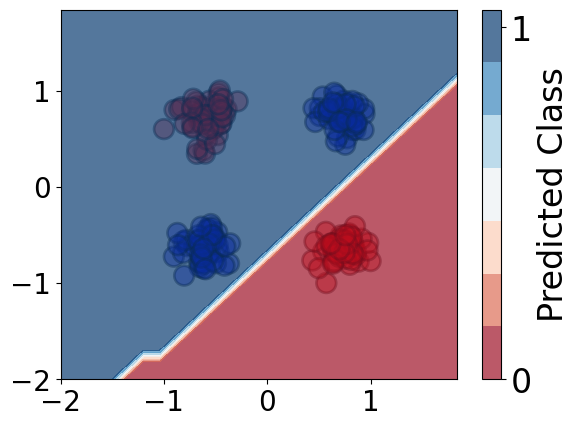

SMOTE


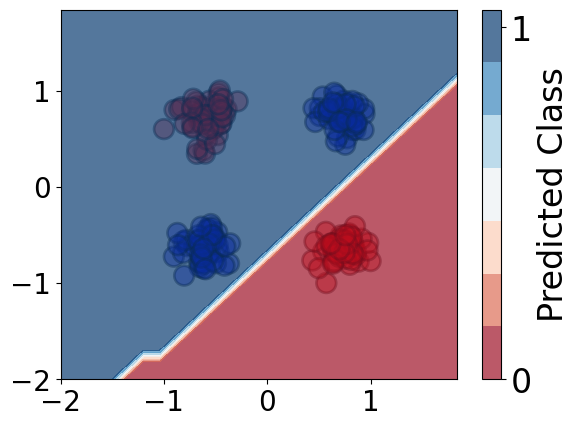

In [27]:
model = 'SVM-linear'
# model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'
data_clf['clf'], clf_SMOTE = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=False)

## Fit deltas

deltas init: [0.999999999999999, 9.183340768361741e-05]
eq. 7 can be satisfied: True
constraint init: True
Grid Search Optimisation Complete
    delta1 : 0.0978902190219022 
    delta2: 0.09789511156357579
    constraint satisfied: True


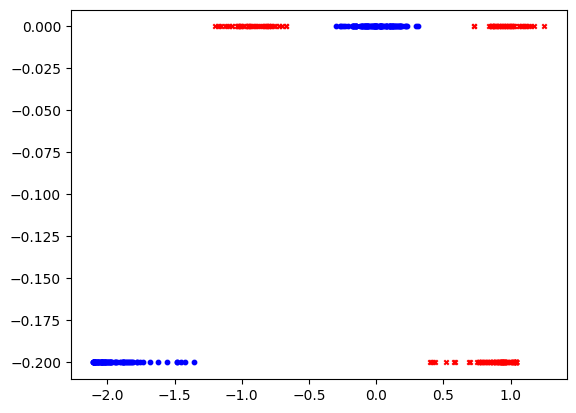

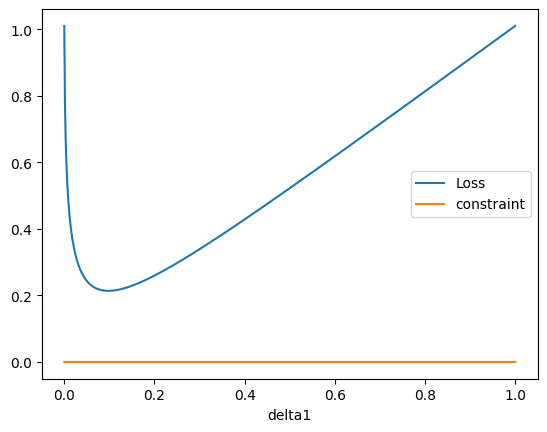

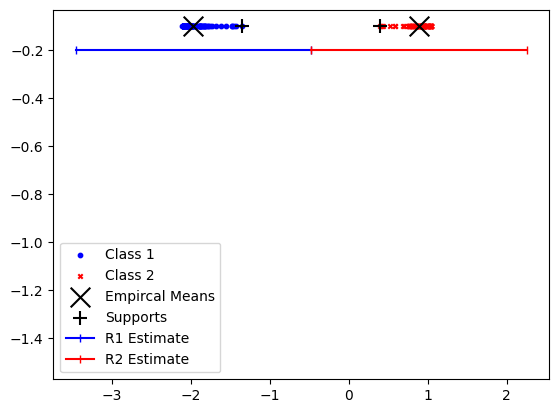

In [28]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
deltas_model = reprojection.reprojection_deltas(clf).fit(X, y, _print=True, _plot=True)

## Show parameters

In [29]:
deltas_model.print_params()
deltas_model.print_deltas()

Parameters
                R:  2.1037491086292155
                N1: 100
                N2: 100
                R1: 0.6133610632636797
                R2: 0.4914038641912735
                M:  1.7485807662114425
                D:  2.853345693666396
                C1: 1
                C2: 1
"
                  delta1: 0.0978902190219022 
                  delta2: 0.09789511156357579
                  constraint: 0.0
                  


# Evaluation on test data

original accuracy: 0.74975
SMOTE accuracy: 0.74975
deltas accuracy: 0.99965

original F1: 0.6663555762949137
SMOTE F1: 0.6663555762949137
deltas F1: 0.9996500174991251

original precision0: 0.6665111007400494
SMOTE precision0: 0.6665111007400494
deltas precision0: 0.9996999699969997

original precision1: 0.9994001199760048
SMOTE precision1: 0.9994001199760048
deltas precision1: 0.9996000399960004

original


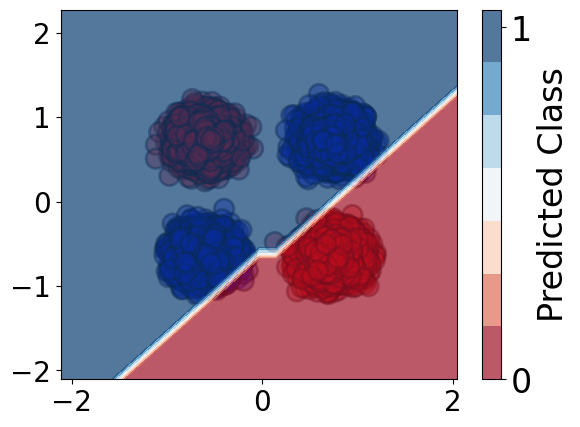

SMOTE


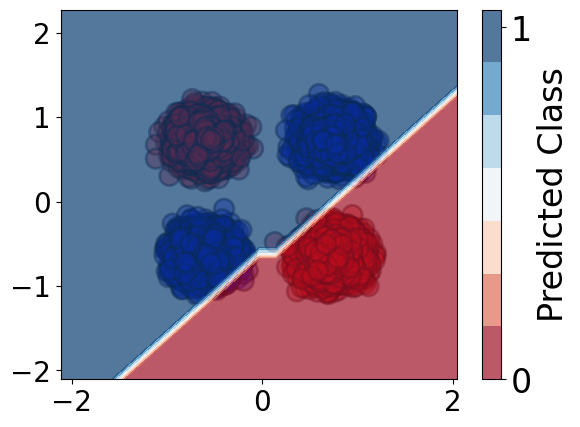

deltas


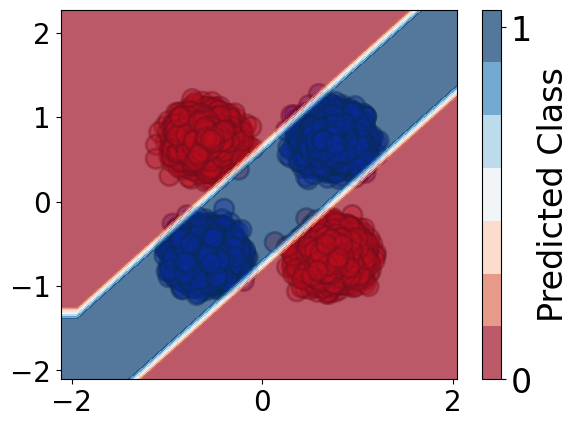

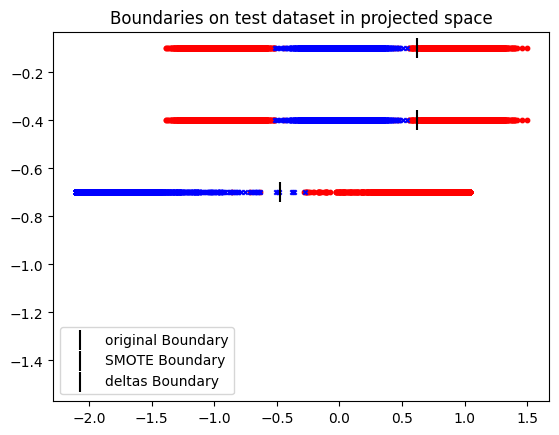

In [33]:
mdels = {'original': clf,
         'SMOTE': clf_SMOTE,
         'deltas': deltas_model}
evaluation.eval_test(mdels, data_clf['data_test'], _print=True, _plot=True)